In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv.imread("./datasets/Emotions Dataset/Emotions Dataset/test/happy/43189.jpg")[:,:,::-1]
img = cv.resize(img, (256, 256))
img = tf.constant(img, dtype=tf.float32)
img = tf.expand_dims(img, axis=0)
img.shape

I0000 00:00:1731007146.842556    9954 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2865 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


TensorShape([1, 256, 256, 3])

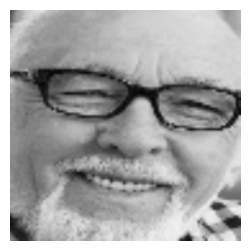

In [3]:
plt.figure(figsize=[3,3])
plt.imshow(img[0]/255.0)
plt.axis("off")
plt.show()

In [4]:
vgg_backbone = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)
vgg_backbone.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def is_conv(layer_name):
    if "conv" in layer_name:
        return True
    else:
        return False

# 23:20:00
# vgg_backbone.layers[1:] -> Doesn't pick the Input layer (because it's not necessary).
layers = [layer.output for layer in vgg_backbone.layers[1:] if is_conv(layer.name)]
feature_maps_model = Model(
    inputs=vgg_backbone.input,
    outputs=layers,
)

# Each row contains the output (feature_map) of one layer.
feature_maps = feature_maps_model.predict(img)

In [6]:
for i in range(len(feature_maps)):
    print(feature_maps[i].shape)

(1, 256, 256, 64)
(1, 256, 256, 64)
(1, 128, 128, 128)
(1, 128, 128, 128)
(1, 64, 64, 256)
(1, 64, 64, 256)
(1, 64, 64, 256)
(1, 32, 32, 512)
(1, 32, 32, 512)
(1, 32, 32, 512)
(1, 16, 16, 512)
(1, 16, 16, 512)
(1, 16, 16, 512)


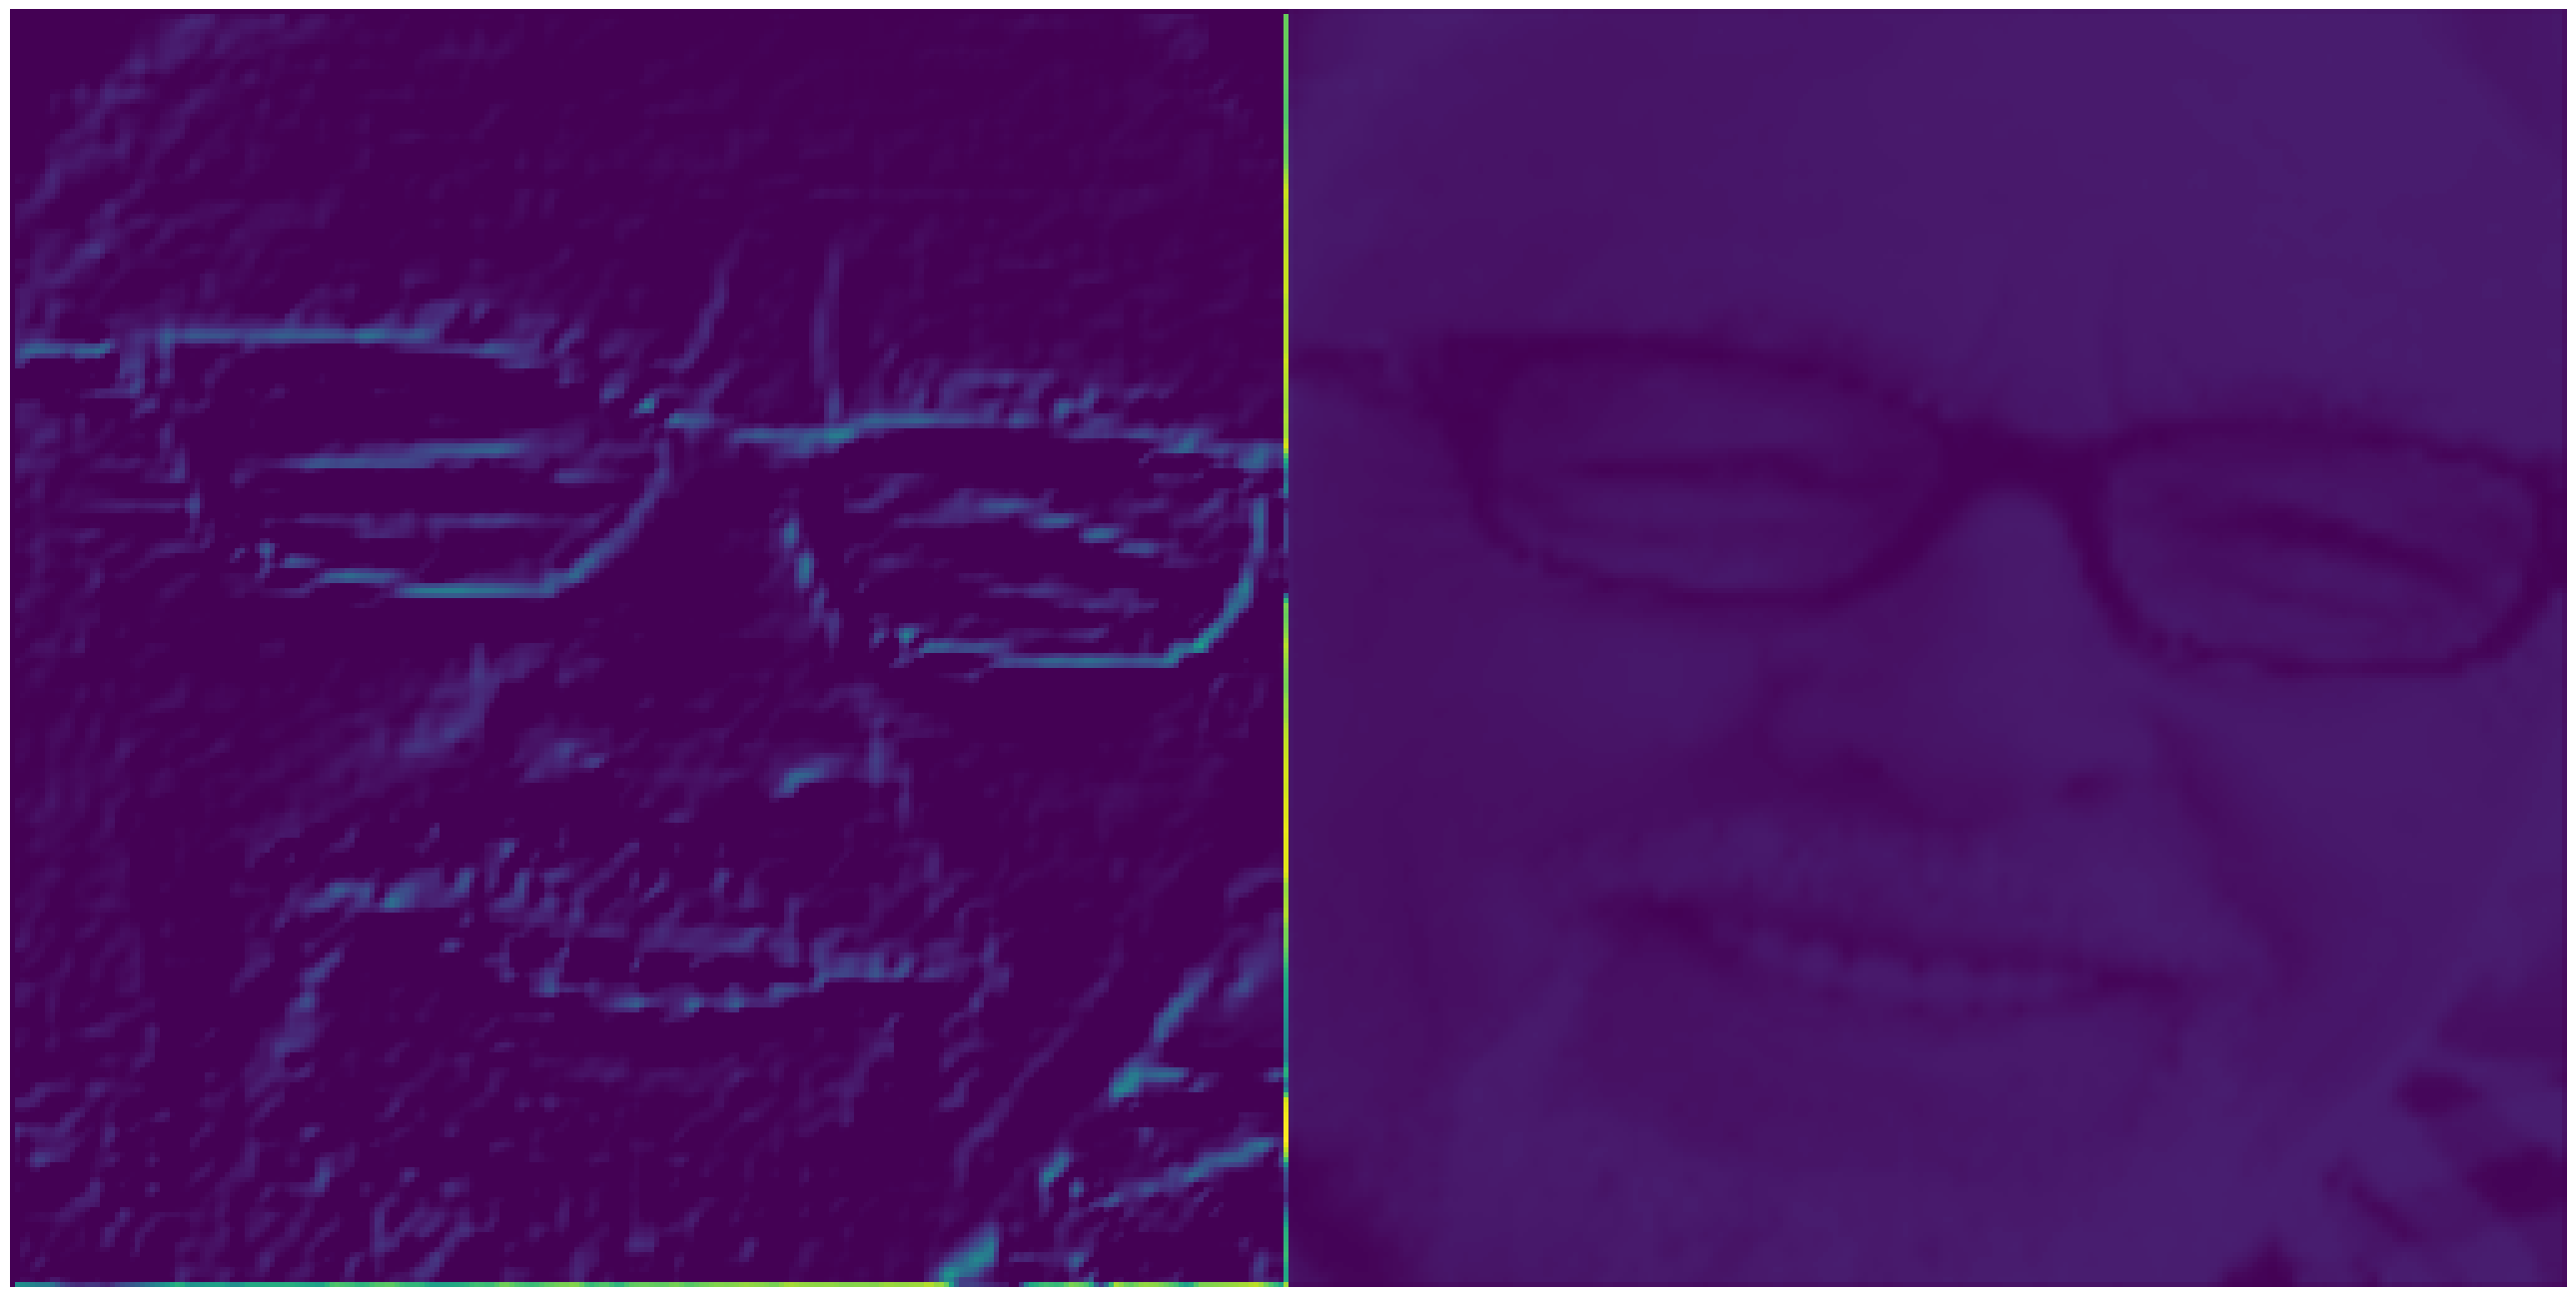

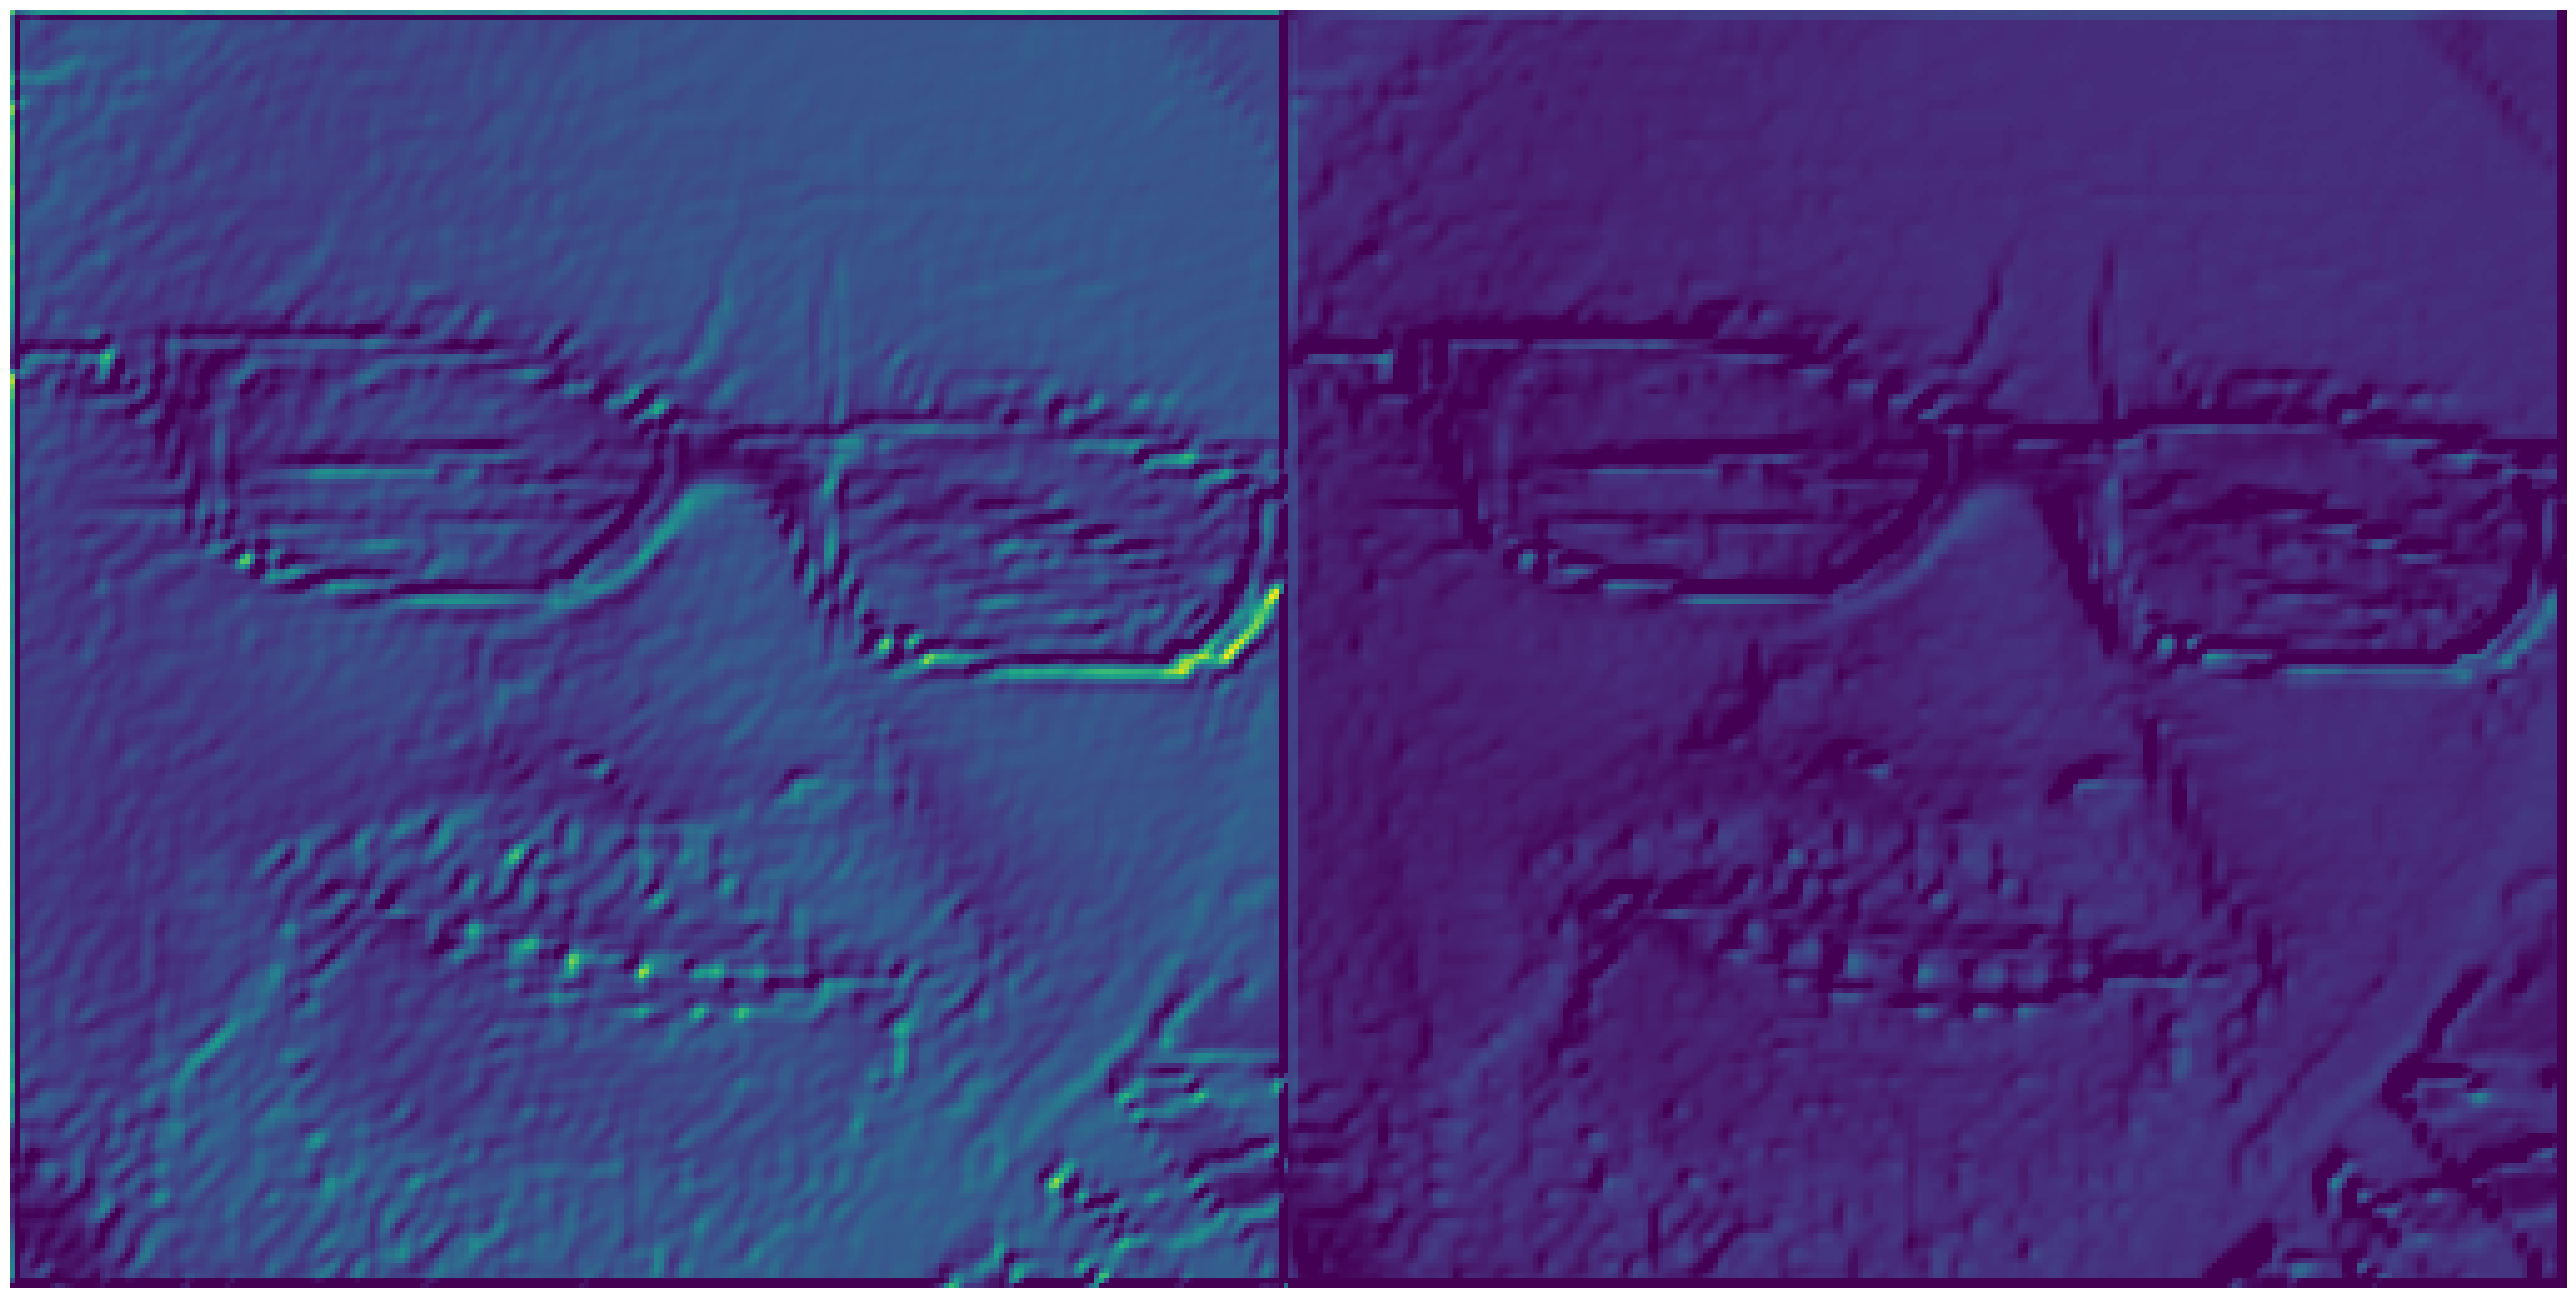

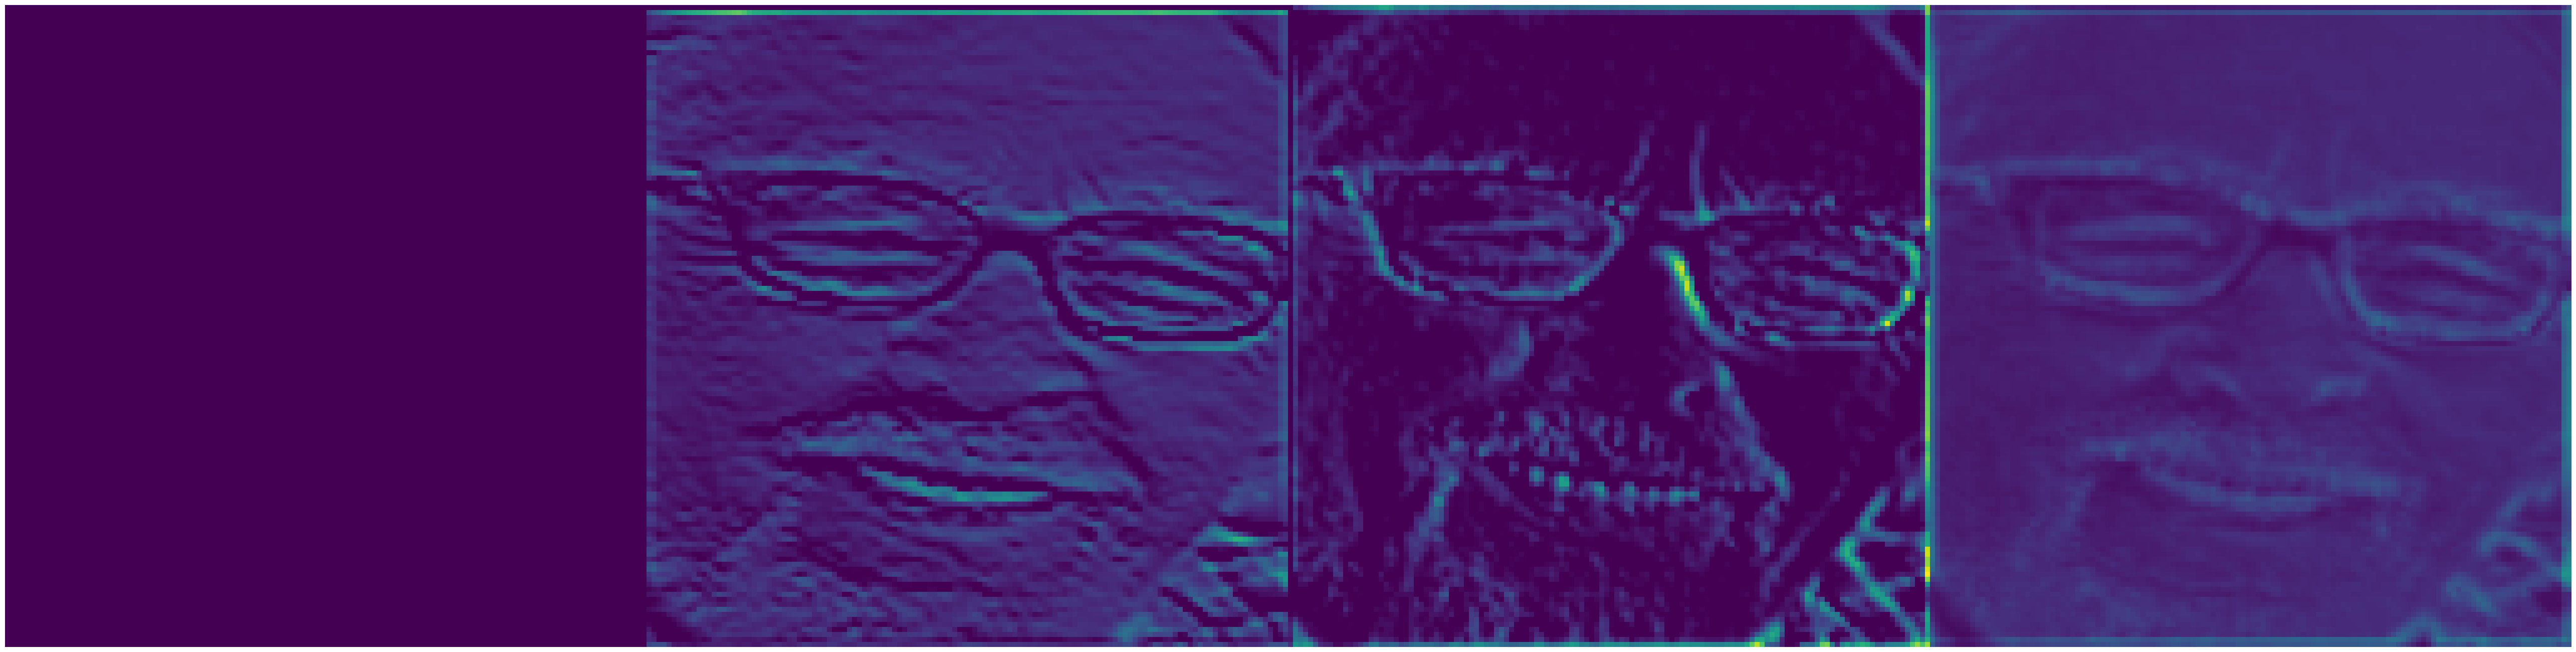

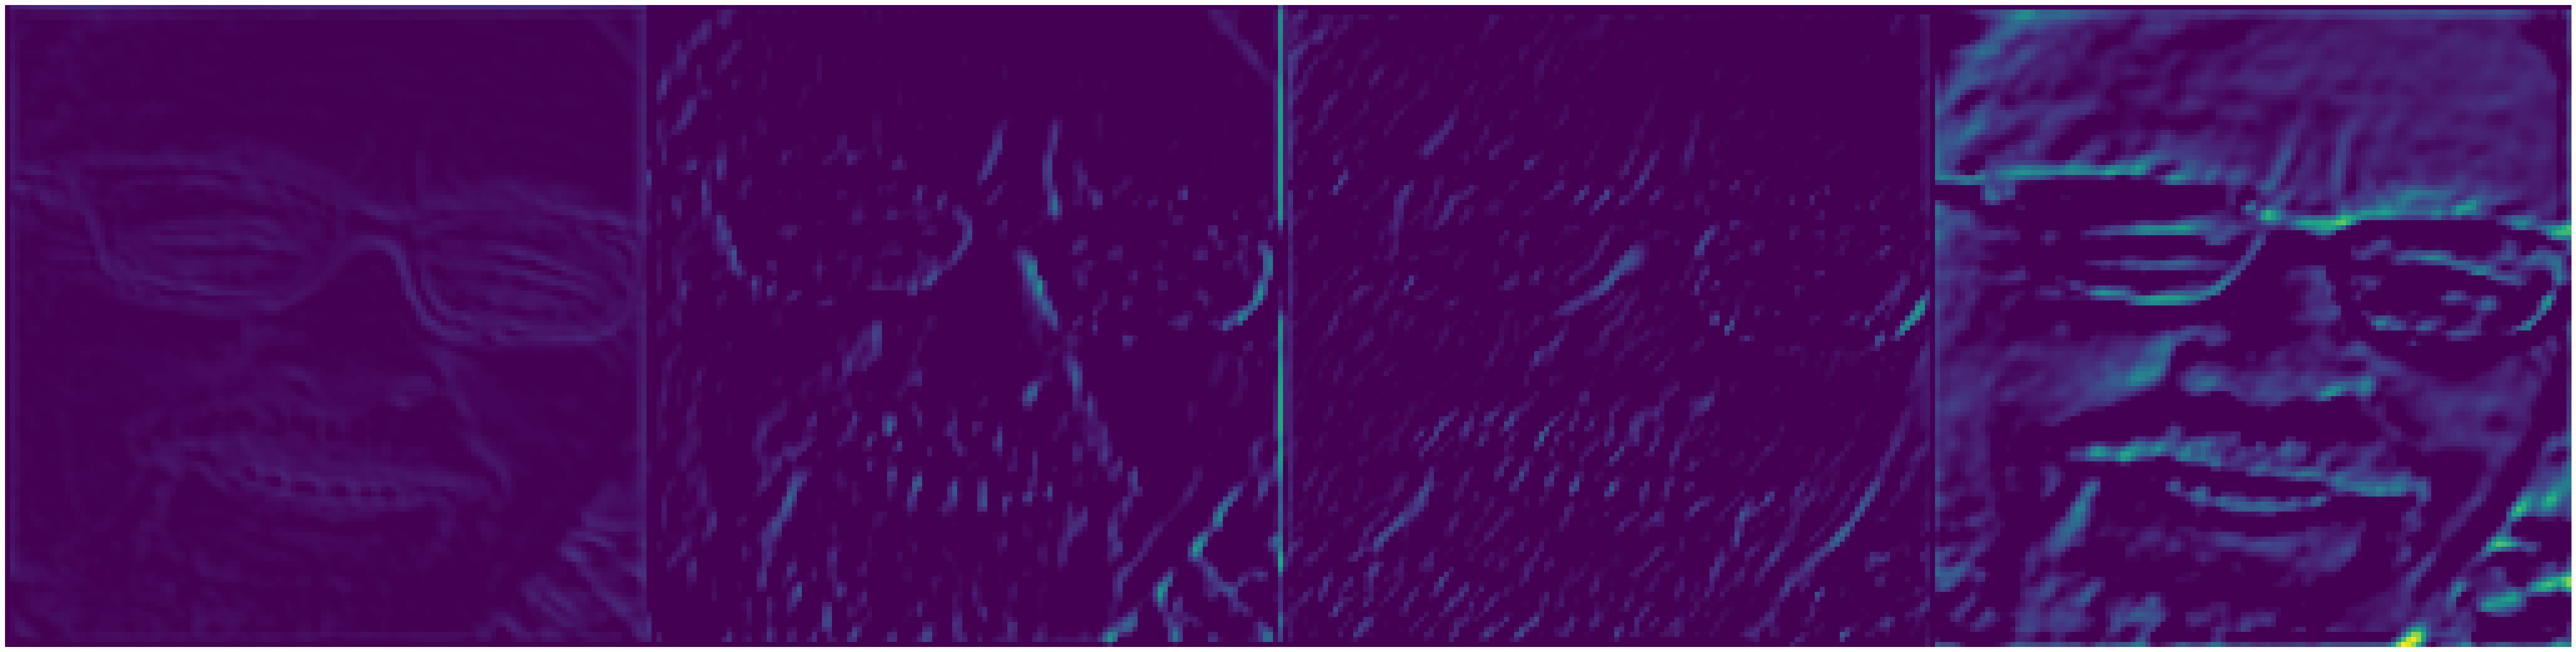

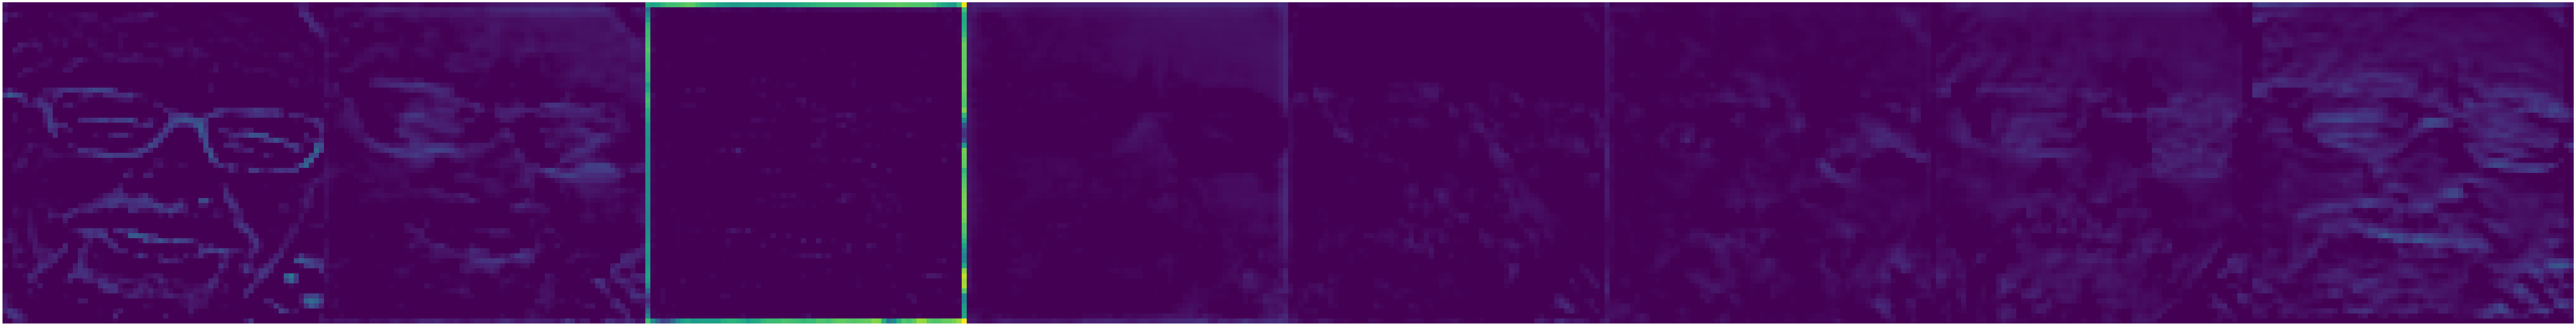

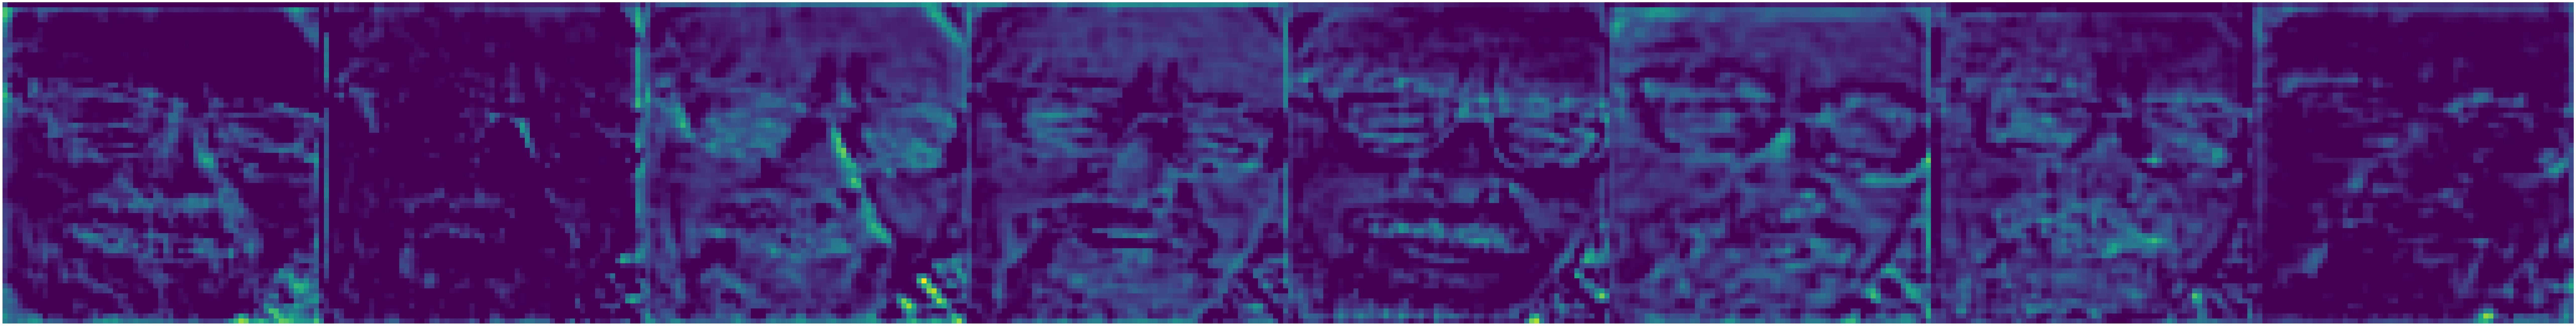

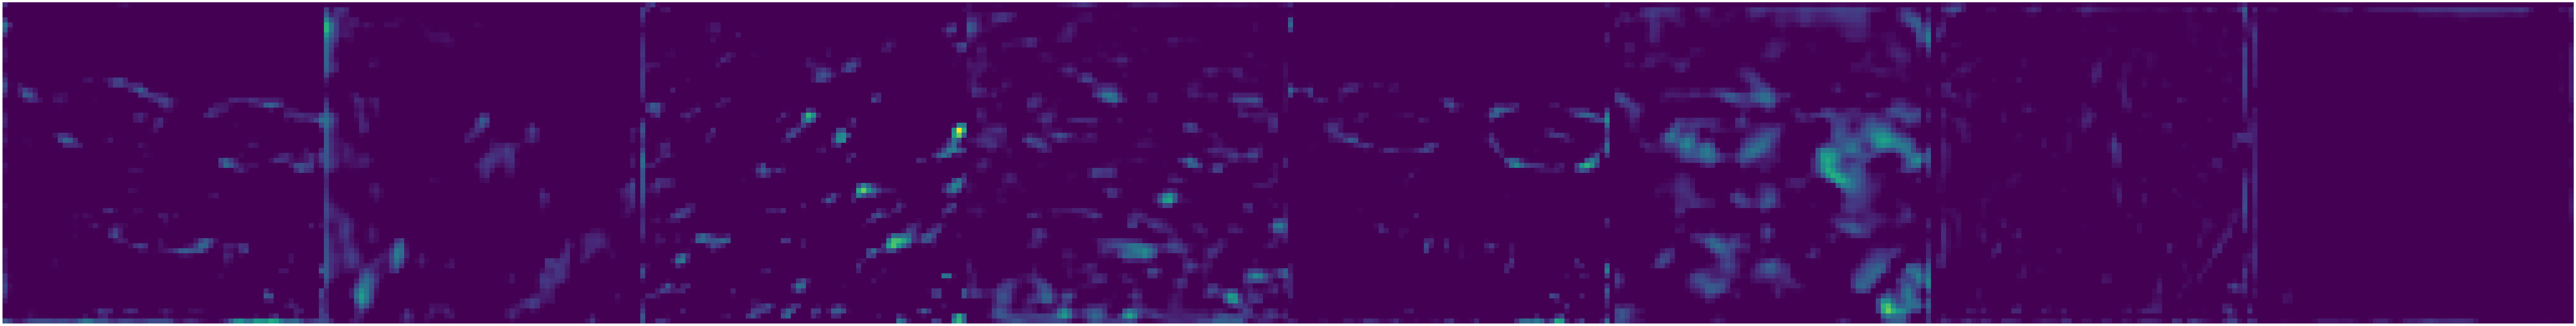

In [ ]:
for i in range(len(feature_maps)):
    plt.figure(figsize=[256, 256])
    
    fm_y = feature_maps[i].shape[1]
    fm_channels = feature_maps[i].shape[3]
    # Probably `fm_x * fm_channels` would make more sense, but since y and x are the same in this case...
    joint_map = np.ones((fm_y, fm_y * fm_channels))

    axs = plt.subplot(len(feature_maps), 1, i+1)
    for j in range(fm_channels):
        # [:, fm_y*j:fm_y*(j+1)]
        # - :                 >> The whole row (we only have one row)
        # - fm_y*j:fm_y*(j+1) >> If j = 0, take the block which corresponds from 0 until fm_y*1
        joint_map[:, fm_y*j:fm_y*(j+1)] = feature_maps[i][..., j]

    # Don't show everything, your ram will die.
    plt.imshow(joint_map[:, 0:512])
    plt.axis("off")

plt.show()